In logistic regression, we establish the relationship between the dependent variable and one or more independent variables by estimating probabilities using an equation ( logistic regression).

<div style="text-align:center"><img alt="Classification" src="https://github.com/thunderstroke325/60-Days-of-Data-Science-and-ML/blob/main/assets/sigmoid.jpg?raw=true"/></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### Load the Data

In [3]:
dt = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/data33.csv')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Data Visualization

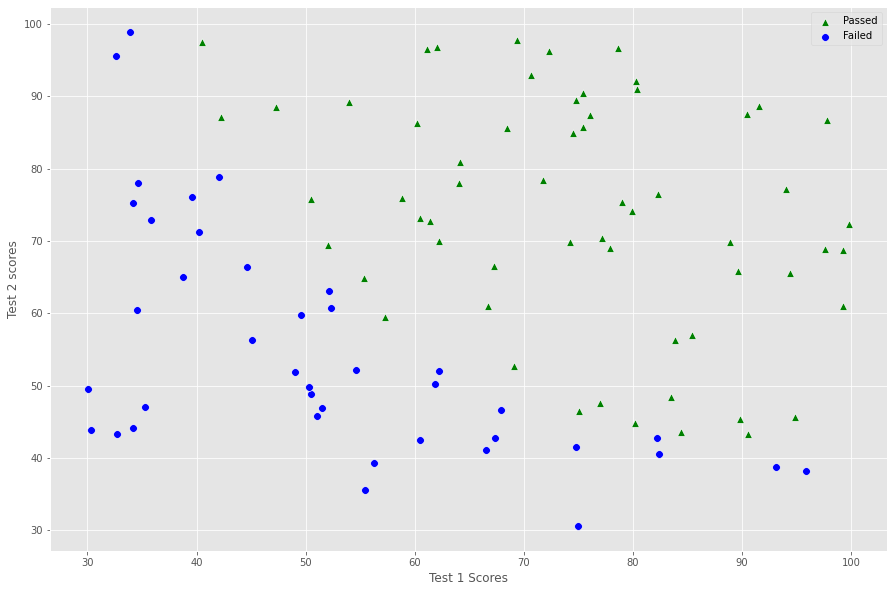

In [4]:
scores = dt[['DMV_Test_1','DMV_Test_2']].values
results = dt['Results'].values
p = (results==1).reshape(100,1)
f = (results==0).reshape(100,1)
ax=sns.scatterplot(x=scores[p[:,0],0],
                  y=scores[p[:,0],1],
                  marker="^",
                  color='green',
                  s=60)
sns.scatterplot(x=scores[f[:,0],0],
                  y=scores[f[:,0],1],
                  marker="o",
                  color='blue',
                  s=60)
ax.set(xlabel='Test 1 Scores',ylabel='Test 2 scores')
ax.legend(['Passed','Failed'])
plt.show();

### Define the Logistic Sigmoid Function 𝜎(𝑧)

In [5]:
def logistic_function(x):
    return 1/(1+np.exp(-x))
logistic_function(0)

0.5

### Compute the Cost Function 𝐽(𝜃) and Gradient

In [6]:
def compute_cost(theta,x,y):
    m=len(y)
    y_pred =logistic_function(np.dot(x,theta))
    error = (y * np.log(y_pred)) +(1-y) * np.log(1-y_pred)
    cost = -1/m * sum(error)
    gradient = 1/m * np.dot(x.transpose(),(y_pred - y))
    return cost[0],gradient

### Cost and Gradient

In [7]:
mean_scores = np.mean(scores,axis=0)
std_scores = np.std(scores, axis=0)
scores = ( scores - mean_scores)/std_scores
rows = scores.shape[0]
cols = scores.shape[1]
X=np.append(np.ones((rows,1)),scores,axis=1)
y=results.reshape(rows,1)
theta_init = np.zeros((cols+1,1))
cost,gradient = compute_cost(theta_init,X,y)
print('Cost : ',cost)
print('Gradient : ',gradient)

Cost :  0.693147180559946
Gradient :  [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Implement Gradient Descent

In [8]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs = []
    for i in range(iterations):
        cost,gradient = compute_cost(theta,x,y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta,costs
theta, costs = gradient_descent(X,y,theta_init,1,200)
print('Theta: ',theta)
print('Resulting Cost: ',costs[-1])

Theta:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting Cost:  0.20489382035120143


### Plotting the Convergence of 𝐽(𝜃)

Text(0, 0.5, '$J(\\Theta)$')

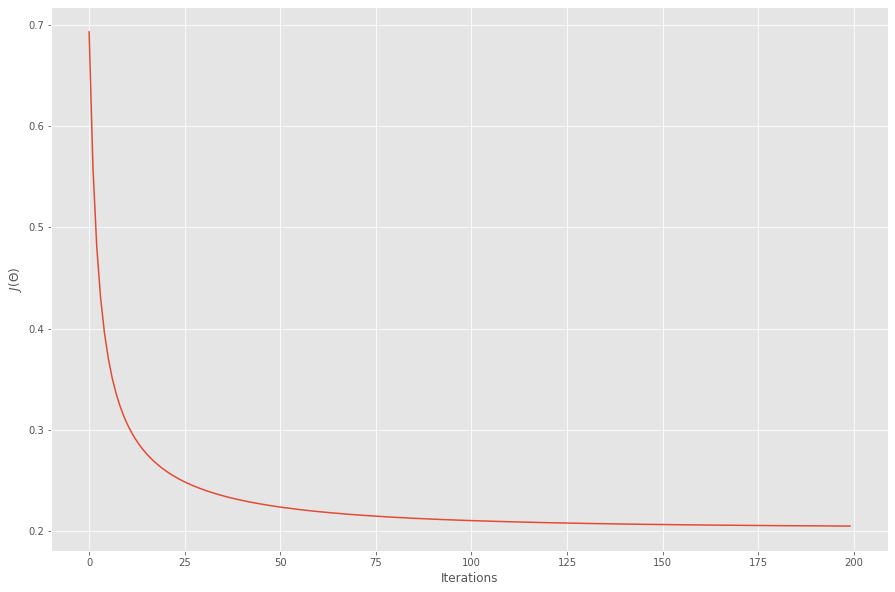

In [9]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')

### Plotting the Decision Boundary

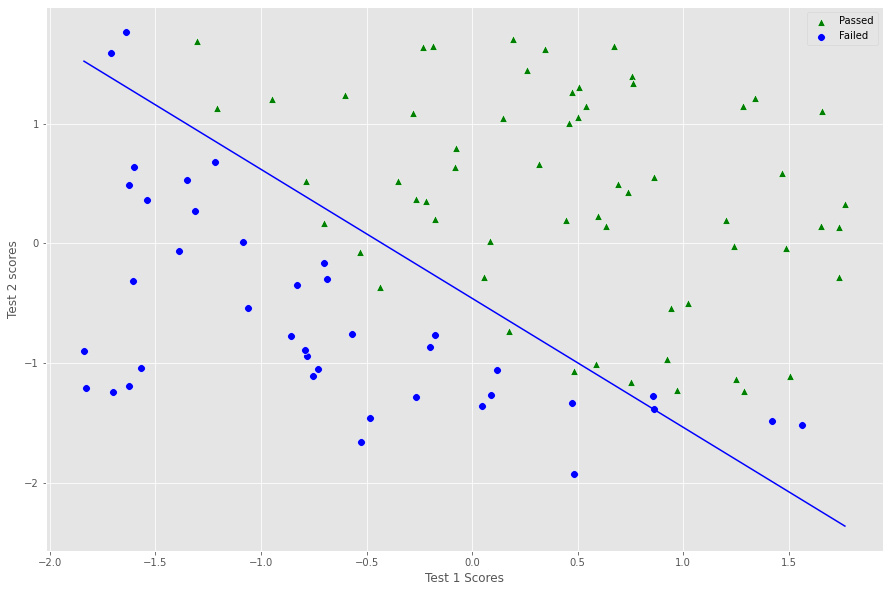

In [10]:
ax=sns.scatterplot(x=X[p[:,0],1],
                  y=X[p[:,0],2],
                  marker="^",
                  color='green',
                  s=60)
sns.scatterplot(x=X[f[:,0],1],
                  y=X[f[:,0],2],
                  marker="o",
                  color='blue',
                  s=60)
ax.set(xlabel='Test 1 Scores',ylabel='Test 2 scores')
ax.legend(['Passed','Failed'])
x_boundary = np.array([np.min(X[:,1]),np.max([X[:,1]])])
y_boundary = -(theta[0] + theta[1] * x_boundary)/theta[2]
sns.lineplot(x=x_boundary,y=y_boundary,color='blue')
plt.show();